# Predictive Analytics

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## K-Nearest Neighbors

KNN can be used for both classification and regression predictive problems and falls in the supervised learning family of algorithms. Our goal is to learn a function  $h : X → Y$  so that given an unseen observation  $x ,  h(x)$  can confidently predict the corresponding output $y$.

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let  $x_i$  be an input sample with $p$ features $(x_{i1}, x_{i2}, ...,x_{ip}), n$ be the total number of input samples $(i=1,2,...,n)$. The Euclidean distance between sample $x_i$ and $x_l$ is is defined as:

$$d(x_{i}, x_{l}) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... + (x_{ip} - x_{lp})^2}$$

KNN follows these steps:
1. Choose the number K of neighbors.
2. Take the K nearest neighbors of the new data point, according to your distance metric.
3. Among these K neighbors, count the number of data points to each category.
4. Assign the new data point to the category where you counted the most neighbors.

## Importing data using Pandas

In [2]:
df_full_weekly = pd.read_csv('Data/3.Data Preparation/df_full_weekly.csv')
df_full_weekly.drop(df_full_weekly.columns[0], axis=1, inplace=True)

df_full_weekly = df_full_weekly.astype('float')
df_full_weekly.head()

,delivery,consumption,T,SQ,Q,N,week,month,season,heating_sys,no_people,no_solar_panels,sp_group
0,91.363,35.031,16.282517,2.041958,68.468531,6.657343,28.0,7.0,2.0,1.0,4.0,17.0,3.0
1,155.805,25.393,18.701190,3.732143,88.041667,5.446429,29.0,7.0,2.0,1.0,4.0,17.0,3.0
2,115.273,12.460,17.673506,2.405493,72.859451,7.172859,30.0,7.0,2.0,1.0,4.0,17.0,3.0
3,23.200,2.087,17.550000,3.958333,89.333333,6.958333,31.0,7.0,2.0,1.0,4.0,17.0,3.0
4,124.050,13.106,17.240972,2.923611,77.013889,5.847222,31.0,8.0,2.0,1.0,4.0,17.0,3.0


### Weekly dataset
#### Predicting the heating system

First of all, we divide the dataset into the X features and the target feature.

In [3]:
features = df_full_weekly.columns[:-4]
target_feature = 'heating_sys'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In order to create the model, we use a Pipeline, which allows us to set what we want to use inside it.

In order to normalize the data, we use the StandarScaler library, which standardize features by removing the mean and scaling to unit variance. The standard score of a sample $x$ is calculated as: $z = (x - u) / s$, where $u$ is the mean of the training samples, and s is the standard deviation of the training samples.

In this case, we use K_Nearest Neighbors. One of the features of the pipeline is that we are able to select different values for the model parameters. The pipeline will execute all the different possibilities and give us the best one. For this model, we will set the following parameters:
* **n_neighbors:** Number of neighbors to use.
* **p:** Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 
* **weights:** Weight function used in prediction. Possible values:
    * uniform: uniform weights. All points in each neighborhood are weighted equally.
    * distance: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [4]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

param_grid = {'knn__n_neighbors': np.arange(5, 15),
              'knn__p': np.arange(1, 3),
              'knn__weights':['uniform', 'distance']}

knn_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
knn_clf.fit(X, y)

score_weekly_hs = knn_clf.best_score_

display(knn_clf.best_estimator_)
display('Score: ' + str(knn_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=1,
           weights='uniform'))])

'Score: 0.632251720747296'

#### Predicting the nº of people

In [5]:
features = df_full_weekly.columns[:-4]
target_feature = 'no_people'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In [6]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

param_grid = {'knn__n_neighbors': np.arange(5, 15),
              'knn__p': np.arange(1, 3),
              'knn__weights':['uniform', 'distance']}

knn_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
knn_clf.fit(X, y)

score_weekly_pe = knn_clf.best_score_

display(knn_clf.best_estimator_)
display('Score: ' + str(knn_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=1,
           weights='distance'))])

'Score: 0.41002949852507375'

#### Predicting the nº of solar panels

In [7]:
features = df_full_weekly.columns[:-4]
target_feature = 'sp_group'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In [8]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

param_grid = {'knn__n_neighbors': np.arange(5, 15),
              'knn__p': np.arange(1, 3),
              'knn__weights':['uniform', 'distance']}

knn_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
knn_clf.fit(X, y)

score_weekly_sp = knn_clf.best_score_

display(knn_clf.best_estimator_)
display('Score: ' + str(knn_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance'))])

'Score: 0.5372009177318912'

## Model scores

In [9]:
knn_scores = pd.DataFrame({'target': ['Heating system', 'Nº of people', 'Nº of solar panels'],
                          'score': [score_weekly_hs, score_weekly_pe, score_weekly_sp]})

Text(0.5, 0, 'Target')

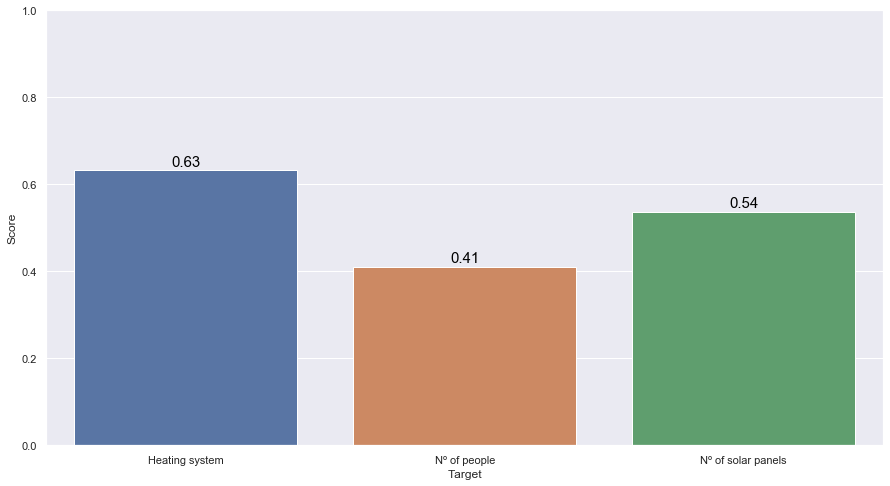

In [10]:
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x="target", y="score", data=knn_scores)

for index, row in knn_scores.iterrows():
    ax.text(index, (row.score + 0.01), round(row.score, 2), color='black', ha="center", fontsize=15)

ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Target')